In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

# Import Datasets

In [2]:
#df = pd.read_csv("gabungan_file.csv", sep=",", encoding='cp1252')
df = pd.read_csv("gabungan_file.csv")
df.drop(columns="Unnamed: 0", inplace=True)
df["jumlah_rt_like"] = df["retweet_count"] + df["favorite_count"]
df.head(3)

,user_id,screen_name,created_at,source,location,text,is_retweet,is_quote,favorite_count,reply_count,retweet_count,quote_count,retweet_screen_name,retweet_created_at,quoted_screen_name,quoted_created_at,lang,jumlah_rt_like
0,3314172242,IndonesiaHanoi,2020-08-18 06:58:23,Twitter for Android,50 Ngo Quyen St,"Before the COVID-19 pandemic, Indonesians used...",True,False,0,NaN,7,NaN,indtravel,2020-08-17 11:43:15,NaN,NaN,en,7
1,3314172242,IndonesiaHanoi,2020-08-17 06:31:36,Twitter Web App,50 Ngo Quyen St,Presiden Jokowi Berbaju Adat NTT Saat Pimpin U...,True,False,0,NaN,26,NaN,KemensetnegRI,2020-08-17 06:27:22,NaN,NaN,in,26
2,3314172242,IndonesiaHanoi,2020-08-17 05:45:16,Twitter Web App,50 Ngo Quyen St,"Kita menikmati arti kemerdekaan, karena kita m...",True,False,0,NaN,8592,NaN,jokowi,2020-08-17 01:00:01,NaN,NaN,in,8592


## Fungsi Klasifikasi

In [3]:
def Klasifikasi(mode):
    a = (df["text"].str.contains("WNI")) | (df["text"].str.contains("Dokumen")) | (df["text"].str.contains("#NegaraMelindungi")) | (df["text"].str.contains("#Covid19"))
    b = (df["text"].str.contains("Hubungan Diplomatik")) | (df["text"].str.contains("Hubungan Bilateral")) | (df["text"].str.contains("Kerja sama")) | (df["text"].str.contains("#IniDiplomasi")) | (df["text"].str.contains("#SahabatKemlu")) | (df["text"].str.contains("#MenluRetno")) | (df["text"].str.contains("#FMMarsudi")) | (df["text"].str.contains("#RintisKemajuan")) | (df["text"].str.contains("#BatikDiplomacy")) | (df["text"].str.contains("#IndonesianWay")) | (df["text"].str.contains("#DigitalDiplomacy")) | (df["text"].str.contains("#DiplomasiKuliner"))
    c = (df["text"].str.contains("UN / United Nation")) | (df["text"].str.contains("ASEAN")) | (df["text"].str.contains("Kerjasama Multilateral")) | (df["text"].str.contains("Rohingya")) | (df["text"].str.contains("Palestina")) | (df["text"].str.contains("Suriah")) | (df["text"].str.contains("Irak")) | (df["text"].str.contains("ISIS")) | (df["text"].str.contains("#IndonesiaUntukDunia")) | (df["text"].str.contains("#CounterTerrorism")) | (df["text"].str.contains("#DiplomacyforPeaceandProsperity"))
    d = (df["text"].str.contains("Papua")) | (df["text"].str.contains("Sawit")) | (df["text"].str.contains("Perbatasan")) | (df["text"].str.contains("Demokrasi Indonesia")) | (df["text"].str.contains("#BaliDemocracyForum"))
    
    if mode == "A":
        filt = a
    elif mode == "B":
        filt = b
    elif mode == "C":
        filt = c
    elif mode == "D":
        filt = d
    elif mode == "Total":
        filt = (a | b | c | d)
        
    return df.loc[filt][["screen_name","text","jumlah_rt_like","lang"]]

## Filter A: Pelayanan / Perlindungan WNI

In [4]:
Klasifikasi("A")

,screen_name,text,jumlah_rt_like,lang
81,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,1,en
94,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,1,en
129,IndonesiaHanoi,"Hai #SahabatKemlu, yuk simak persembahan #Teri...",60,in
143,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,2,en
153,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,7,en
...,...,...,...,...
59810,kbrisingapura,Kepada WNI di Singapura yang akan hadir pada u...,2,in
59884,kbrisingapura,"11. Sejak dilakukannya intensifikasi evakuasi,...",12,in
59885,kbrisingapura,10. 2 diplomat&amp; WNI yang terluka telah men...,10,in
59886,kbrisingapura,9. Kemlu telah menginstruksikan kepada KBRI da...,8,in


## Filter B: Diplomasi Indonesia

In [5]:
Klasifikasi("B")

,screen_name,text,jumlah_rt_like,lang
9,IndonesiaHanoi,“History has taught us that crisis may also cr...,41,en
11,IndonesiaHanoi,@IndonesiaHanoi will organize an Online Sessio...,2,en
31,IndonesiaHanoi,With the aim of introducing #Indonesian cultur...,4,en
35,IndonesiaHanoi,@IndonesiaHanoi will hold “Online Session on E...,3,en
40,IndonesiaHanoi,"Dear #IACS Alumni, \r\n\r\nlet’s get together ...",2,en
...,...,...,...,...
59523,kbrisingapura,Manfaatkan gadget u/ maksimalkan #DigitalDiplo...,14,in
59524,kbrisingapura,Workshop Pengelolaan Media Digital Kemlu &amp;...,12,in
59579,kbrisingapura,Great meeting with @Portal_Kemlu_RI #MenluRetn...,14,en
59580,kbrisingapura,#MenluRetno dan senior editor media Australia ...,10,in


## Filter C

In [6]:
Klasifikasi("C")

,screen_name,text,jumlah_rt_like,lang
9,IndonesiaHanoi,“History has taught us that crisis may also cr...,41,en
15,IndonesiaHanoi,#HAPPYASEANDAY2020 : ASEAN Foreign Minister re...,33,en
17,IndonesiaHanoi,"On 7/8, Ambassador Ibnu Hadi attended the ASEA...",8,en
19,IndonesiaHanoi,The ASEAN caught up with four older individual...,4,en
20,IndonesiaHanoi,"On 8th of August 2020, @ASEAN will celebrate i...",5,en
...,...,...,...,...
59672,kbrisingapura,"Delri (Kemensos) hadiri ""Long-term Care for El...",1,en
59673,kbrisingapura,Delri dipimpin Jusuf Wanandi didampingi Asdep ...,1,in
59683,kbrisingapura,MinCouns Tjoki S. mewakili Dubes RI dihadapan ...,1,in
59691,kbrisingapura,Kesiapan Indonesia Menghadapi Masyarakat ASEAN...,1,in


## Filter D

In [7]:
Klasifikasi("D")

,screen_name,text,jumlah_rt_like,lang
582,IndonesiaHanoi,"Pd Minggu (15/09), telah dlaksanakan Kegiatan ...",2,in
595,IndonesiaHanoi,"Pada Sabtu (07/09), sekitar 50 #WargaNegaraInd...",3,in
725,IndonesiaHanoi,Indonesian Arts and Culture Scholarship (IACS)...,46,in
734,IndonesiaHanoi,Duka cita yang mendalam bagi para Pahlawan Dem...,830,in
1046,IndonesiaHanoi,45. Kelompok separatisme dan pendukungnya haru...,21,in
...,...,...,...,...
59817,kbrisingapura,Fact #4: All Papuans are free to travel overse...,58,en
59818,kbrisingapura,Revised Fact #3: Claims by ULMWP of rampant Hu...,36,en
59819,kbrisingapura,Fact #2: Indonesian is home to 11 million Mela...,58,in
59820,kbrisingapura,Fact #1: West Papua is an integral part of Ind...,58,en


In [8]:
total_data = Klasifikasi("A").shape[0] + Klasifikasi("B").shape[0] + Klasifikasi("C").shape[0] + Klasifikasi("D").shape[0]
total_data

23189

# Total Data

In [14]:
df_total = Klasifikasi("Total")
df_total

,screen_name,text,jumlah_rt_like,lang
9,IndonesiaHanoi,“History has taught us that crisis may also cr...,41,en
11,IndonesiaHanoi,@IndonesiaHanoi will organize an Online Sessio...,2,en
15,IndonesiaHanoi,#HAPPYASEANDAY2020 : ASEAN Foreign Minister re...,33,en
17,IndonesiaHanoi,"On 7/8, Ambassador Ibnu Hadi attended the ASEA...",8,en
19,IndonesiaHanoi,The ASEAN caught up with four older individual...,4,en
...,...,...,...,...
59821,kbrisingapura,Good Morning! We would like to start the day b...,44,en
59884,kbrisingapura,"11. Sejak dilakukannya intensifikasi evakuasi,...",12,in
59885,kbrisingapura,10. 2 diplomat&amp; WNI yang terluka telah men...,10,in
59886,kbrisingapura,9. Kemlu telah menginstruksikan kepada KBRI da...,8,in


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

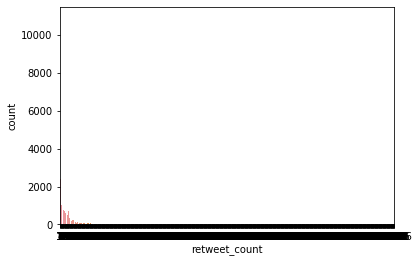

In [11]:
sns.countplot(df["retweet_count"])
plt.show()

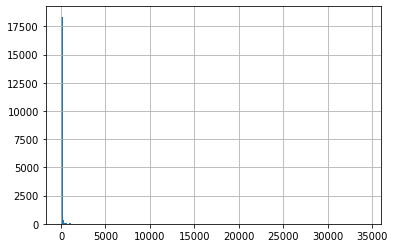

In [20]:
df_total["jumlah_rt_like"].hist(bins=190)

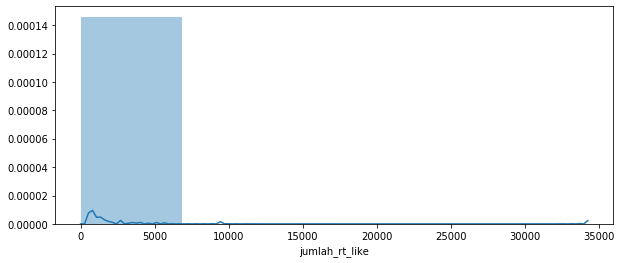

In [37]:
plt.figure(figsize=(10, 4))
ax = sns.distplot(df_total["jumlah_rt_like"], bins=5)